# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [76]:
def deriv(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    x0 = x # координаты трёх точек схемы
    x1 = x0 + h 
    x2 = x0 +2*h
    df = -3*f(x0)/2 + 2*f(x1) - f(x2)/2 # "числитель" для вычисления производной
    return df/h

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [77]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(lambda x: x**3, x, h)
    print("%5f -- %7.4g" % (h, err))

0.010000 -- -0.0002
0.001000 --  -2e-06
0.000100 --  -2e-08
0.000010 --  -2e-10


Из лекции известно, что ошибка вычислений складывается из e_r и e_t. Первая из них пропорциональна ef(x)/h, где х должен быть равен нулю. Вторая пропорциональна f'''(x)h^2/3, так как порядок аппроксимации О(h^2). Но f(x) = x^3, тогда итоговая ошибка примерно равна e(0)^3/h + h^2 * 6/3 = 0, то есть итоговая ошибка пропорциональна 2h^2, что мы и видим при численной проверке.

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [78]:
from math import log

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

Сначала напишем функцию для двухточечной односторонней схемы.

In [79]:
def deriv_2(f, x, h):
    x0 = x # координаты двух точек схемы
    x1 = x0 + h 
    df = f(x1) - f(x0) # "числитель" для вычисления производной
    return df/h

Для функции из первого пункта (трёхточечная схема), ошибка должна перестать возрастать при h прмерно порядка 10^(-5)



Для двухточечной схемы, ошибка должна перестать возрастать примерно при h порядка 10^(-8)



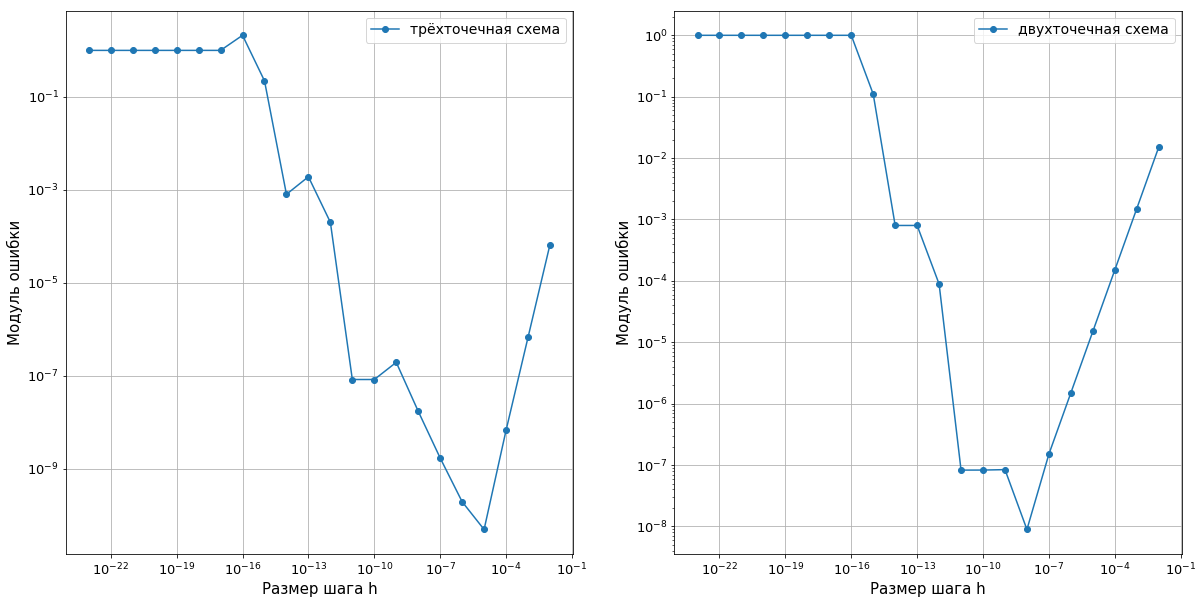

In [80]:
import matplotlib.pyplot as plt
import pylab
x = 1
err_1 = []
err_2 = []
H = [1e-2, 1e-3,1e-4, 1e-5, 1e-6,1e-7, 1e-8,1e-9, 1e-10, 1e-11,1e-12, 1e-13, 1e-14, 1e-15, 1e-16, 1e-17, 1e-18, 1e-19, 1e-20, 1e-21, 1e-22, 1e-23]
print('Для функции из первого пункта (трёхточечная схема), ошибка должна перестать возрастать при h прмерно порядка 10^(-5)')
print('')
# Вы сказали, что вычисления можно не приводить, но еси нужно, они могут быть предоставлены по запросу. 
for h in H:
    err = deriv(f, x, h) - 1
    err_1.append(abs(deriv(f, x, h) - 1))
    #print("%5f -- %7.4g" % (h, err))
print('\n')
#pylab.semilogx(H, err_1)
print('Для двухточечной схемы, ошибка должна перестать возрастать примерно при h порядка 10^(-8)')
# Вы сказали, что вычисления можно не приводить, но еси нужно, они могут быть предоставлены по запросу. 
print('')
for h in H:
    err = deriv_2(f, x, h) - 1
    err_2.append(abs(deriv_2(f, x, h) - 1))
    #print("%5f -- %7.4g" % (h, err))  

plt.figure(figsize=(20, 10)) # Размер картинки

plt.subplot(121) # Сетка для графиков и их расположение на ней
plt.loglog(H, err_1, 'o-', label = 'трёхточечная схема')
#plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14])
plt.xlabel('Размер шага h', fontsize = 15)
plt.ylabel('Модуль ошибки', fontsize = 15)
plt.xticks( fontsize= 13)
plt.yticks( fontsize= 13)
plt.legend(fontsize= 14)
plt.grid()


plt.subplot(122) # Сетка для графиков и их расположение на ней
plt.loglog(H, err_2, 'o-', label = 'двухточечная схема')
#plt.xticks([0, 1, 2, 3, 4, 5])
plt.xlabel('Размер шага h', fontsize = 15)
plt.ylabel('Модуль ошибки', fontsize = 15)
plt.xticks( fontsize= 13)
plt.yticks( fontsize= 13)
plt.grid()
plt.legend(fontsize= 14)

Таким образом, по графикам находим примерное положение минимумов функций ошибок. Получаем, что для трёхточечной схемы минимум (оптимальный размер шага h) имеет порядок 10^(-5). Для двухточечной схемы оптимальный размер шага порядка 10^(-8). Оба экспериментальных значения согласуются с теоретической оценкой.

### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

0.010000 -- -0.01386
0.001000 -- -0.001386
0.000100 -- -0.0001386
0.000010 -- -1.386e-05
0.000001 -- -1.386e-06
0.000000 -- -1.386e-07
0.000000 -- -1.386e-08
0.000000 -- -1.386e-09
0.000000 -- -1.386e-10
0.000000 -- -1.386e-11
0.000000 -- -1.386e-12
0.000000 -- -1.386e-13
0.000000 -- -1.386e-14
0.000000 -- -1.386e-15
0.000000 -- -1.386e-16
0.000000 -- -1.386e-17
0.000000 -- -1.386e-18
0.000000 -- -1.386e-19
0.000000 -- -1.386e-20


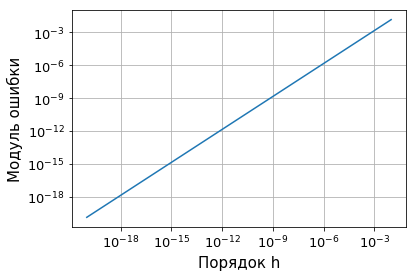

In [81]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
errr = []
HH =  [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11,1e-12, 1e-13, 1e-14, 1e-15, 1e-16, 1e-17, 1e-18, 1e-19, 1e-20]
for h in [1e-2, 1e-3, 1e-4, 1e-5, 1e-6, 1e-7, 1e-8, 1e-9, 1e-10, 1e-11,1e-12, 1e-13, 1e-14, 1e-15, 1e-16, 1e-17, 1e-18, 1e-19, 1e-20]:
    err = deriv(f, x, h) - fder(x)
    print("%5f -- %7.4g" % (h, err))
    errr.append(abs(deriv(f, x, h) - fder(x)))
plt.loglog(HH, errr)
plt.xlabel('Порядок h', fontsize = 15)
plt.ylabel('Модуль ошибки', fontsize = 15)
plt.xticks( fontsize= 13)
plt.yticks( fontsize= 13)
plt.grid()


Теперь ошибка линейно зависит от размера шага h. Так и должно быть, так как если мы запишем выражение для ошибки: err = |f'(x) - Df| = |f'(x) - (-1.5f(x) + 2f(x+h) - 0.5f(x+2h))/h| = |0 + 1.5x^2ln(x) - 2(x+h)^2ln(x+h) +0.5(x+2h)^2(x+2h)|/h, где x = 0, тогда это равно: |0 + 0 -2h^2ln(h)+ 2h^2ln(2h)|/h = 2h|ln(2h/h)| = 2h(ln(2)), то есть ошибка пропорциональна h ! (С коэффициентом пропорциональности 2ln(2), что даже похоже на результаты вычислений).  

# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [196]:
def midpoint_rule(func, a, b, eps):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    """
    # Сначала слелаем внутреннюю функцию, которая будет считать "интеграл" при заданном кол-ве элементарных отрезков.
    def f_help(N):
        summ = 0
        h = abs(a-b)/N # где N - кол-во отрезков, получаем ширину элементарного интервала.
        for i in range(N): # Проходимся по левым концам отрезков (от 0 до N-1)
            x = i*h + h/2 
            summ  += func(x)*h # добавляем в сумму площадей площадь очередного прямоугольничка.
        return(summ)
    # Теперь будем менять кол-во интервалов до тех пор, пока не достигнем желаемой точности...
    Int = 0 # Здесь будет лежать значение интеграла 
    N = 1
    delta = abs(f_help(N) - f_help(2*N))
    while delta >= eps:
        N = 2*N
        delta = abs(f_help(N) - f_help(2*N))
    I = f_help(2*N)
    return I

#print(midpoint_rule(lambda x: x**3, 0, 1, 10**(-5))) # Можно проверить, что интегралы как-то считаются на простом примере. 

### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


Оказалось, что нужно читать задание до конца, а только потом начинать его выполнять... Поэтому теперь простой интеграл из предыдущего пункта будет лежать здесь.

In [197]:
# Считаем интеграл от x^3  на отрезке от 0 до 1. Ответ должент быть равен 0.25
print(midpoint_rule(lambda x: x**3, 0, 1, 10**(-5))) 

0.2499980926513672


Получилось очень даже неплохо:

In [198]:
print('Модуль разности между точным значением и результатом работы функции',
      abs(midpoint_rule(lambda x: x**3, 0, 1, 10**(-5)) - 0.25))

Модуль разности между точным значением и результатом работы функции 1.9073486328125e-06


Теперь проверим сходимость. Должна быть О(N^(-2))

In [199]:
def midpoint_rule_mod(func, a, b, eps):
  
    # Сначала слелаем внутреннюю функцию, которая будет считать "интеграл" при заданном кол-ве элементарных отрезков.
    def f_help(N):
        summ = 0
        h = abs(b-a)/N # где N - кол-во отрезков, получаем ширину элементарного интервала.
        for i in range(N): # Проходимся по левым концам отрезков (от 0 до N-1)
            x = i*h + h/2 
            summ  += func(x)*h # добавляем в сумму площадей площадь очередного прямоугольничка.
        return(summ)
    # Теперь будем менять кол-во интервалов до тех пор, пока не достигнем желаемой точности...
    Int = 0 # Здесь будет лежать значение интеграла 
    N = 1
    delta = abs(f_help(N) - f_help(2*N))
    while delta >= eps:
        N = 2*N
        delta = abs(f_help(N) - f_help(2*N))
    N = 2*N
    I = f_help(2*N)
    return I, N
#print(midpoint_rule_mod(lambda x: x**3,0, 1, 10**(-5)))
#print(midpoint_rule_mod(lambda x: x**3, 0, 1, 10**(-5))[1])

0.001250 -- 3.052e-05
0.000125 -- 7.629e-06
0.000013 -- 4.768e-07
0.000001 -- 2.98e-08
0.000000 -- 7.451e-09
0.000000 -- 4.657e-10
0.000000 -- 2.91e-11

Теперь для того, чтобы понять, согласуется ли отклонение с предсказанием (этот метод численного интегрирования должен давать
ошибку порядка N^(-2))будем выводить (для разных eps) отклонение интеграла от точного значения и N. Следующим столбцом будем выводить 1/N^2

3.0517578125e-05 -- 32 -- 0.0009765625
7.62939453125e-06 -- 64 -- 0.000244140625
4.76837158203125e-07 -- 256 -- 1.52587890625e-05
2.9802322387695312e-08 -- 1024 -- 9.5367431640625e-07
7.450580596923828e-09 -- 2048 -- 2.384185791015625e-07
4.656612873077393e-10 -- 8192 -- 1.4901161193847656e-08
2.910366392328001e-11 -- 32768 -- 9.313225746154785e-10

[0.03125    0.03125    0.03125    0.03125    0.03125    0.03125
 0.03124982]

Для оценки будем считать, что константа постоянная. Поэтому сделаем дополнительный столбик, в котором должно быть примерное
значение отклонения (если о

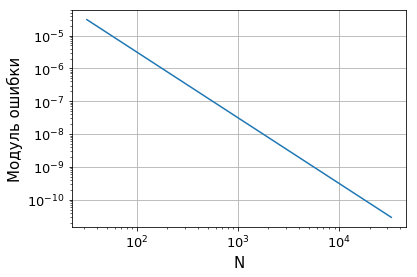

In [201]:
import numpy as np
Eps = (0.00125, 1.25e-04, 1.25e-05, 1.25e-06, 1.25e-07, 1.25e-08, 1.25e-09)
RR = []
NN = []
for n in Eps:
    R = abs(0.25 - midpoint_rule_mod(lambda x: x**3, 0, 1, n)[0] )
    RR.append(R) 
    NN.append(midpoint_rule_mod(lambda x: x**3, 0, 1, n)[1])
    print("%5f -- %7.4g" % (n, R))
print('')
 # Чтобы было удобнее сравнивать
plt.loglog(NN, RR)
plt.xlabel('N', fontsize = 15)
plt.ylabel('Модуль ошибки', fontsize = 15)
plt.xticks( fontsize= 13)
plt.yticks( fontsize= 13)
plt.grid()

print('Теперь для того, чтобы понять, согласуется ли отклонение с предсказанием (этот метод численного интегрирования должен давать\nошибку порядка N^(-2))будем выводить (для разных eps) отклонение интеграла от точного значения и N. Следующим столбцом будем выводить 1/N^2')
print('')
for n in Eps:
    print(abs(0.25 - midpoint_rule_mod(lambda x: x**3, 0, 1, n)[0] ), '--', midpoint_rule_mod(lambda x: x**3, 0, 1, n)[1], '--', 1/(midpoint_rule_mod(lambda x: x**3, 0, 1, n)[1])**2)
#Теперь попытаемся рассчитать константу пропорциональности (для наглядности)
constt = np.zeros(7)
print('')
for i in range(7):
    constt[i] = abs(0.25 - midpoint_rule_mod(lambda x: x**3, 0, 1, Eps[i])[0])*(midpoint_rule_mod(lambda x: x**3, 0, 1, Eps[i])[1])**2
print(constt)
print('')
print('Для оценки будем считать, что константа постоянная. Поэтому сделаем дополнительный столбик, в котором должно быть примерное\nзначение отклонения (если оно действительно зависит от N так, как было предсказано)')
print('')
for n in Eps:
    print(abs(0.25 - midpoint_rule_mod(lambda x: x**3, 0, 1, n)[0] ), '--', 0.03125/(midpoint_rule_mod(lambda x: x**3, 0, 1, n)[1])**2)
    

Получается, что ошибка обратно пропорциональна второй степени N (как и должна).

### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [202]:
def sin_s(x):
    return np.sin(np.sqrt(x))/x # Введём функцию, которую нужно проинтегрировать

In [204]:
midpoint_rule_mod(sin_s, 0, 1, 10**(-4))

(1.892018460401388, 8388608)

In [205]:
def sin_s_mod(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return np.sin(np.sqrt(x))/x - 1/np.sqrt(x)
    

Теперь мы разобьём подынтегральное выражение на две части sin(sqrt(x))/x и 1/sqrt(x). Сингулярность тепрь пропадает. Численно считаем интеграл только от первой части, интеграл от второй части в данном случае равен 2.

In [206]:
midpoint_rule_mod(sin_s_mod, 0, 1, 10**(-4))

(-0.10785295004119368, 32)

Тогда значение исходного интеграла равно:

In [211]:
2 + midpoint_rule_mod(sin_s_mod, 0, 1, 10**(-4))[0]

1.8921470499588062

Для этого потебовалось итераций:

In [213]:
midpoint_rule_mod(sin_s_mod, 0, 1, 10**(-4))[1]

32

Для первого способа потребовалось поделить отрезок интегрирования на более 8 миллионов частей! Во втором способе нужная точность была, достигнута уже при 32-ух отрезках. Кроме того, время вычислений замето сократилось. Преимущества второго способа очевидны. 